<a href="https://colab.research.google.com/github/julitostrong/PROGET-PYTHON_skearn/blob/main/formdeep01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Reconnaissance d'écriture manuscrite à l'aide de CNN**

**Les CNN :**

Les réseaux de neurones convolutionnels (Convolutional Neural Networks, CNN) sont un type de réseaux de neurones utilisés couramment en apprentissage automatique pour la reconnaissance d'images et de patterns. Ils sont particulièrement efficaces pour traiter des données qui ont une structure spatiale, comme les images et les séries temporelles.

Les CNN sont construits à partir de couches de neurones qui utilisent des filtres de convolution pour détecter des motifs dans les données d'entrée. Ces filtres sont des matrices de poids qui sont appliquées sur les données d'entrée en effectuant une opération de convolution, ce qui permet de détecter des caractéristiques locales dans les données.

Les CNN comprennent souvent plusieurs couches de convolution et de pooling qui permettent de capturer des motifs de différentes tailles et de différents niveaux de détail. Les couches de convolution utilisent souvent des fonctions d'activation ReLU (Rectified Linear Unit) pour limiter la sortie de chaque neurone à un nombre positif en "coupant" les résultats négatifs à zéro. Les couches de pooling réduisent la dimension des données en prenant le maximum de chaque sous-ensemble de données.

Après les couches de convolution et de pooling, les CNN comprennent généralement des couches de neurones pleinement connectées qui prennent en entrée les caractéristiques détectées par les couches précédentes et effectuent la prédiction finale. Les CNN sont souvent utilisés pour la classification d'images, mais peuvent également être utilisés pour d'autres tâches de traitement d'image, telles que la génération d'images, la segmentation d'image et la détection d'objets.

Dans cet exemple, nous utilisons la base de données de la bibliothèque Keras contenant des chiffres écrits à la main.

### Exemple Illustration : (source medium) 

![Image](https://miro.medium.com/max/828/1*uAeANQIOQPqWZnnuH-VEyw.webp)


In [1]:
from keras.datasets import mnist

In [2]:
df = mnist.load_data()
#charge les donner dentrainnement et de test

11490434/11490434 [==============================] - 0s 0us/step


## affichage du contenue de notre base de données 

In [3]:
# creation d'une function generatrice de nombre d'indice aleatoire pour le subploting
import random

def generate(n : int, lenOfElement : int) -> list:
    elementsListe = []
    for i in range(n):
        elementsListe.append(random.randint(0,lenOfElement))
    return elementsListe

In [4]:
print(generate(12,168))

[26, 5, 143, 129, 155, 69, 115, 58, 158, 158, 155, 151]


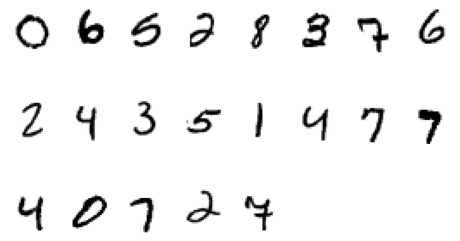

In [5]:
# executé plusieur fois pour que le plot change 
# ce-ci vous donnes un appercu des données 
# affichage de quelque pictorane des ecrits manuscrit ...

import matplotlib.pyplot as plt

# creation d'un axe de multi ploting on decide d'affiché 20 image aleatoire:
def plotting(subplotting : int, lenListe : int,grilleAffiche : list ) -> None:
    nplots = subplotting
    liste = generate(subplotting,lenListe)
    fig = plt.figure(figsize=(8,8))
    for j in range(nplots):
        plt.subplot(grilleAffiche[0],grilleAffiche[1],j+1)
        plt.imshow(df[0][0][liste[j]], cmap='binary')
        plt.axis('off')
    plt.show()

if __name__ =="__main__":
    try:
        plotting(21,60000,[5,8])
    except ValueError:
        print("AJUSTER LA GRILLE")


#**Mise en place du modèle**

## **Importation des librairies**

## **CONTRUCTION DU TRAINTSET ET TESTSET**

#### mnist contient 70000 images avec train à 90% et un test à 10% par defaut

In [7]:
import numpy as np
np.random.seed(1234)
(X_train, y_train), (X_test, y_test) = mnist.load_data() # CHARGEMENT DES DONNEES DEPUIS MNIST
#elle contien 70000 images de 28px/28px

#60000 images pour le train et 10000 pour le test 
print(X_train.shape, y_train.shape) # taille du train 

(60000, 28, 28) (60000,)


In [12]:
print(X_test.shape, y_test.shape) # taille du test

(10000, 28, 28, 1) (10000,)


#### Prétraitement de données au format  (n_samples, hauteur, largeur, n_canaux)
Canal:
- 3 = RGB
- 1 = Noir & Blanc


In [13]:
# transposition  
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

 la méthode **reshape** de NumPy est utilisée pour modifier la forme des tableaux X_train et X_test. La méthode reshape prend en entrée un tuple indiquant la nouvelle forme souhaitée pour le tableau et retourne un nouveau tableau avec cette forme, sans modifier l'original.

Dans le cas de X_train, le tuple (X_train.shape[0], 28, 28, 1) indique que le nouveau tableau aura le même nombre de lignes que l'original (X_train.shape[0]), mais que chaque ligne sera transformée en une matrice de 28x28 pixels avec un seul canal de couleur (1).

De cette façon, le tableau X_train est modifié pour avoir la forme (n_samples, 28, 28, 1), où n_samples est le nombre de lignes dans le tableau original.

Le même processus est effectué sur le tableau X_test, qui est modifié pour avoir la même forme que X_train.

Cette modification de la forme des données est souvent nécessaire lorsque vous utilisez des réseaux de neurones convolutionnels (CNN) pour traiter des images, car les CNN attendent souvent que les données d'entrée soient organisées sous forme de tableaux de dimensions **(n_samples, hauteur, largeur, n_canaux)**.

In [14]:
import keras 
import numpy as np 
import pandas as pd
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D

- **keras** est une bibliothèque de réseaux de neurones conçue pour être facile à utiliser et à étendre. Elle est basée sur TensorFlow, une bibliothèque de calcul numérique en deux dimensions pour Python.

- **numpy** est une bibliothèque de calcul scientifique qui fournit des fonctionnalités avancées pour travailler avec des tableaux et des matrices de nombres.

- **pandas** est une bibliothèque de manipulation de données qui permet de manipuler et d'analyser facilement des données structurées sous forme de tableaux.

- **tensorflow** est une bibliothèque de calcul en deux dimensions pour Python qui permet de développer et de déployer des modèles de deep learning de manière efficace.

- **mnist** est un jeu de données de chiffres manuscrits qui est souvent utilisé pour tester et évaluer les modèles de reconnaissance de caractères.

- **Sequential** est une classe de Keras qui permet de créer un modèle de réseau de neurones séquentiel, c'est-à-dire un modèle formé de couches de neurones qui s'exécutent les unes à la suite des autres.

- **Dense** est une couche de neurones pleinement connectée de Keras qui permet de créer une couche de réseau de neurones dans lequel tous les neurones sont connectés aux neurones de la couche précédente et suivante.

- **Dropout** est une couche de Keras qui permet de régulariser un modèle en "éteignant" aléatoirement certains neurones pendant l'entraînement. Cela peut aider à prévenir le surapprentissage et à améliorer la généralisation du modèle.

- **Flatten** est une couche de Keras qui permet de transformer un tenseur de données de haute dimension en un tenseur à une dimension, ce qui est nécessaire pour utiliser certaines couches de réseaux de neurones qui ne peuvent travailler qu'avec des données à une dimension.

- **Conv2D** est une couche de convolution 2D de Keras qui permet de créer une couche de réseau de neurones de convolution qui peut détecter des motifs dans des données d'image ou de signal.

- **MaxPool2D** est une couche de max pooling 2D de Keras qui permet de réduire la dimension des données en prenant le maximum de chaque sous-ensemble de données. Cela peut être utile pour réduire la complexité du modèle et améliorer les performances.

In [15]:
# taille entrer du reseau
input_shape = (28, 28, 1)

In [16]:
# [0,...,9] = 10 classe
num_classes= 10

In [17]:
# passe des matrice en un format categorique 
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

**tf.keras.utils.to_categorical()**
permet de convertir des étiquettes de classe en vecteurs de catégories.

Elle prend en entrée une liste ou un tableau d'étiquettes de classe sous forme de nombres entiers (par exemple [0, 1, 2, 3]) et renvoie un tableau de vecteurs de catégories correspondants (par exemple [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]).

In [18]:
# retypage 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [19]:

model = Sequential()
# extracteur
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", padding='same',input_shape=input_shape))
model.add(MaxPool2D())

model.add(Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'))
model.add(MaxPool2D())

model.add(Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'))
model.add(MaxPool2D())
model.add(Flatten())

# Reseau de neurones
model.add(Dense(units=256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

en bref :
Ce code en Python définit un modèle de réseau de neurones utilisant le framework de deep learning **Keras**. Le modèle est de type **"séquentiel"**, c'est-à-dire qu'il est formé de couches de neurones qui s'exécutent les unes à la suite des autres.

Le modèle commence par une couche de convolution 2D (Conv2D) avec 32 filtres, une taille de noyau de 3 et une fonction d'activation ReLU (Rectified Linear Unit). La couche de convolution permet de détecter des motifs dans les données d'entrée (ici des images). La fonction d'activation **ReLU** permet de limiter la sortie de chaque neurone à un nombre positif en "coupant" les résultats négatifs à zéro. La couche suivante est une couche de max pooling 2D (MaxPool2D) qui réduit la dimension des données en prenant le maximum de chaque sous-ensemble de données.

Le modèle comprend également deux autres couches de convolution 2D et de max pooling 2D similaires, ainsi qu'une couche de aplatissement (Flatten) qui transforme les données en un tenseur à une dimension. Le modèle comprend également deux couches de neurones pleinement connectées (Dense) avec 256 et 10 neurones respectivement, ainsi qu'une couche de dropout (Dropout) qui "éteint" aléatoirement certains neurones pendant l'entraînement afin de régulariser le modèle et d'améliorer ses performances. La dernière couche est une couche de sortie avec 10 neurones et une fonction d'activation softmax qui permet de fournir des prédictions sous forme de vecteurs de probabilités pour chaque classe de sortie possible.

In [21]:
# parametrage du modele
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer= tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

La méthode **compile** de l'objet **model** permet de configurer le modèle de réseau de neurones avant de le lancer pour l'entraînement. Cette méthode prend en entrée plusieurs arguments qui permettent de spécifier la fonction de perte à utiliser **(loss)**, **l'optimiseur** à utiliser et les **métriques** à suivre pendant l'entraînement et l'évaluation du modèle.
Dans notre cas :

Dans cet exemple, la fonction de perte **categorical_crossentropy** est utilisée pour mesurer l'erreur du modèle lors de la prédiction des classes de sortie (ce qui est souvent le cas lorsque vous travaillez avec des données de classification multi-classe). 

L'optimiseur **adam** est utilisé pour mettre à jour les poids du modèle pendant l'entraînement. 

Les métriques de **accuracy** sont utilisées pour suivre la précision du modèle pendant l'entraînement et l'évaluation.


In [22]:
# execution 
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=20,
    verbose=1,
) 

Epoch 1/20
469/469 [==============================] - 107s 226ms/step - loss: 0.2266 - accuracy: 0.9293 - val_loss: 0.0468 - val_accuracy: 0.9836
Epoch 2/20
469/469 [==============================] - 112s 238ms/step - loss: 0.0568 - accuracy: 0.9830 - val_loss: 0.0319 - val_accuracy: 0.9888
Epoch 3/20
469/469 [==============================] - 108s 231ms/step - loss: 0.0375 - accuracy: 0.9880 - val_loss: 0.0280 - val_accuracy: 0.9909
Epoch 4/20
469/469 [==============================] - 111s 236ms/step - loss: 0.0305 - accuracy: 0.9906 - val_loss: 0.0264 - val_accuracy: 0.9919
Epoch 5/20
469/469 [==============================] - 110s 234ms/step - loss: 0.0245 - accuracy: 0.9923 - val_loss: 0.0268 - val_accuracy: 0.9918
Epoch 6/20
469/469 [==============================] - 112s 238ms/step - loss: 0.0199 - accuracy: 0.9938 - val_loss: 0.0236 - val_accuracy: 0.9929
Epoch 7/20
469/469 [==============================] - 110s 234ms/step - loss: 0.0161 - accuracy: 0.9948 - val_loss: 0.0311 -

KeyboardInterrupt: ignored

la méthode **fit** de l'objet **model** execute l'apprentissage.La méthode evaluate pour évaluer le modèle sur des données de test et la méthode predict pour faire des prédictions sur de nouvelles données.

# Performance du models

In [ ]:
# affichage des score 
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
#accuracy performance du model ,lost perte 

Test loss: 0.03728451952338219
Test accuracy: 0.9912999868392944


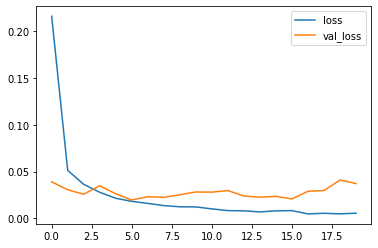

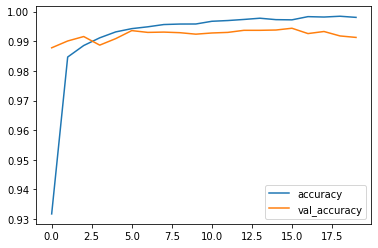

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

l'observation des grahes montre l'absence d'overfitting 😁

# Fonction pour le Test

In [ ]:
# definir un intervale de valeur a selectioné dans notre Testset
def intervaleTest(ends : int) -> tuple:
    chiffre = np.squeeze(X_test[:ends])
    prediction = model.predict(X_test[:ends])
    yield (prediction,chiffre)

In [ ]:
def Test(nombre : int = 1) -> None:
    for el in intervaleTest(nombre):
        for i in range(len(el[0])):
            valeur_predite = np.argmax(el[0][i])
            vraie_valeur = np.argmax(y_test[i])
            print(f'valeur predite : {valeur_predite}')
            print(f'vraie valeur : {vraie_valeur}')
            plt.imshow(el[1][i],cmap='binary')
            plt.show()
 

# **Test du modèle (prediction)** 

1/1 [==============================] - 0s 106ms/step
valeur predite : 7
vraie valeur : 7


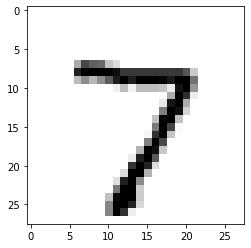

valeur predite : 2
vraie valeur : 2


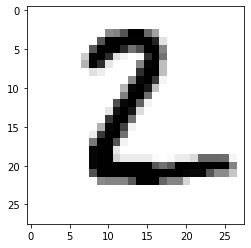

valeur predite : 1
vraie valeur : 1


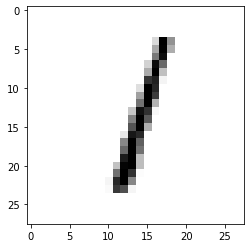

valeur predite : 0
vraie valeur : 0


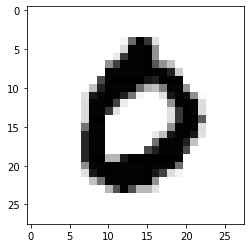

valeur predite : 4
vraie valeur : 4


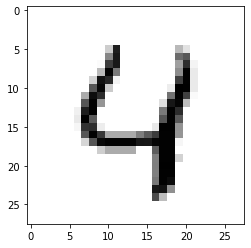

valeur predite : 1
vraie valeur : 1


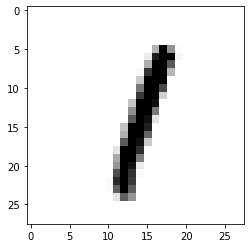

valeur predite : 4
vraie valeur : 4


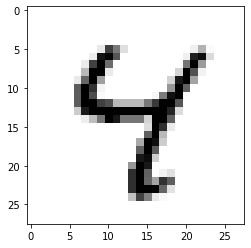

valeur predite : 9
vraie valeur : 9


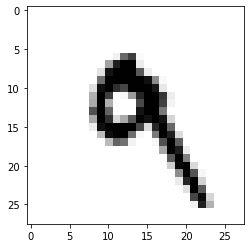

valeur predite : 5
vraie valeur : 5


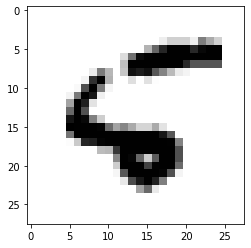

valeur predite : 9
vraie valeur : 9


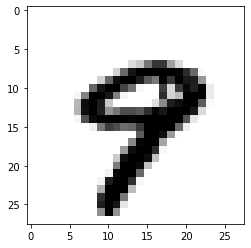

valeur predite : 0
vraie valeur : 0


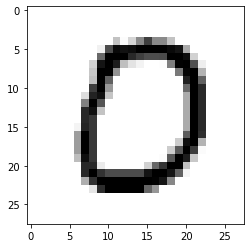

valeur predite : 6
vraie valeur : 6


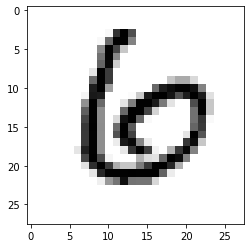

In [ ]:
# on teste avec les 12 premières valeurs de nos données de test vous pouvez l'étendre
Test(12)